# Color-Color Curve Method

## 1) Background

When a supernova (SN) is affected by a non-negligible host galaxy color excess Eh(B-V), the quantification of this value is crucial to accurately infer its physical parameters. In [Rodríguez et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014AJ....148..107R/abstract) I showed that for normal Type II SNe (SNe II) the linear B-V versus V-I color-color curve (C3), during the plateau phase, can be used to estimate Eh(B-V) through the method proposed by [Natali et al. 1994](https://ui.adsabs.harvard.edu/abs/1994A%26A...289..756N/abstract). The latter technique was originally developed to estimate interstellar color excesses for open clusters. The C3 method measures Eh(B-V) from the vertical displacement of an observed V-I versus B-V C3 with respect to a reddening-free one (see [Figure 3](https://iopscience.iop.org/article/10.1088/0004-6256/148/6/107#aj501994f3) of [Rodríguez et al. 2014](https://ui.adsabs.harvard.edu/abs/2014AJ....148..107R/abstract)).

In [Rodríguez et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.5459R/abstract) I developed a routine to compute Eh(B-V) given a set of BVI light curves evaluated at the same epochs, called **Color-Color Curve Method (C3M)**. This routine adopts the [Fitzpatrick
(1999)](https://ui.adsabs.harvard.edu/abs/1999PASP..111...63F/abstract) extinction curve with Rv=3.1.

For any question, email me at olrodrig@gmail.com

**If you use the C3M code in your work, please cite [Rodríguez et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014AJ....148..107R/abstract) and [Rodríguez et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.5459R/abstract).**

## 2) Installation

The C3M code does not require installation, but it has dependencies that must be satisfied.

### 2.1) Dependencies

The C3M code is written on Python 3, so you have to install it (in Ubuntu: apt install Python3). In addition, you need to install numpy and matplotlib. To install them with pip3: `pip3 install numpy matplotlib`.

### 2.2) Loading C3M

Assuming that the C3M Python files are in the directory `/path/tofiles`, you have to include the following lines in your code

`import sys
sys.path.append(/path/tofiles)
from C3M import Color_Color_Curve_Method`

## 3) Description

The unique class in C3M is Color_Color_Curve_Method.

`Color_Color_Curve_Method(t_BVI, EGBV=0.0, z_helio=0.0, t_min=0.0, t_max=2.5e6)`

### Parameters:

- **t_BVI: dictionary.** Epochs and apparent BVI photometry. Keys are: 't' for the epochs, 'B', 'V', 'I', 'eB', 'eV', and 'eI' for the BVI magnitudes and their errors, respectively. For each key, the dictionary value must be an array. For each epoch, apparent BVI photometry MUST be provided.
- **EGBV: float (default: 0.0).** Galactic color excess of the input SN.
- **z_helio: float (default: 0.0).** Heliocentric redshift of the input SN.
- **t_min: float, optional (default: 0.0).** Lower time limit for the photometry that will be used to compute Eh(B-V).
- **t_max: float, optional (default: 2.5e6).** Upper time limit for the photometry that will be used to compute Eh(B-V).

### Attributes:

- **EhBV: float.** Host galaxy color excess computed with the C3 method.
- **err_EhBV: dictionary.** One-sigma error in Eh(B-V). Keys are "stat" for the statistical error and "stat+sys" for the total error.

### Methods:

`plot(panels, sn="", time_label="Time", figure_name="")`

Plot apparent BVI light curves, the V-I versus B-V C3, and/or the Eh(B-V) estimates as a function of the time.

**Parameter:**

* **panels: string.** Panels to be displayed, with a maximum of two. Available panels are: "lc" for apparent BVI light curves, "c3" for the V-I versus B-V C3, and "Eh" for Eh(B-V) estimates as a function of the time. If the string "-zoom" is included (e.g., "lc-zoom"), then only the selected data to compute Eh(B-V) are displayed. To display two panels, their names have to be contatenated with "+" (e.g., "lc+Eh-zoom").
* **sn: string (default:"").** SN name.
* **time_label: string (default:"Time").** Label for the time coordinate (e.g., "JD", "MJD", etc.).
* **figure_name: string (default:"").** Name of the output figure (e.g. "c3.pdf"). If figure_name="", then the figure is not saved.


## 4) Example

The C3M Python files are in the folder called `src`, which is in the same parent directory of the folder with this tutorial. Then, to load the class `Color_Color_Curve_Method`, we execute

In [1]:
import sys
sys.path.append('../src')
from C3M import Color_Color_Curve_Method

To make this tutorial easier to follow, I created the routine `read_BVI_photometry` (which is not part of the C3M code) to read the example BVI photometry

In [2]:
from read_BVI_photometry import read_BVI_photometry

For this example, we will use the apparent BVI photometry of SN 2014G. For this SN, the Galactic color excess and heliocentric redshift are the following

In [3]:
EGBV, z_helio = 0.010, 0.0027

First, we read the input BVI photometry

In [4]:
t_BVI = read_BVI_photometry('example_data/SN2014G_MJD_BVI')

`t_BVI` is a dictionary containing the photometry of SN 2014G. For example, the array with the epochs (in this case MJD) is

In [5]:
t_BVI["t"]

array([56672.97, 56673.88, 56677.92, 56681.92, 56682.93, 56684.91,
       56685.89, 56686.89, 56687.91, 56688.83, 56689.84, 56690.86,
       56697.82, 56699.88, 56700.91, 56704.81, 56705.8 , 56707.89,
       56709.74, 56710.78, 56713.84, 56718.77, 56723.76, 56724.77,
       56728.79, 56729.75, 56730.87, 56732.83, 56734.72, 56735.73,
       56736.71, 56737.71, 56738.82, 56749.62, 56754.76, 56755.7 ,
       56756.84, 56758.76, 56761.69, 56766.72, 56767.71, 56768.71,
       56772.8 , 56773.7 , 56775.65, 56781.69, 56786.67, 56787.68,
       56790.67, 56792.68, 56794.63, 56797.67, 56798.67, 56803.67,
       56806.68, 56835.65])

and the array containing the B-band magnitudes (for the epochs previously listed) is

In [6]:
t_BVI["B"]

array([15.043, 14.911, 14.829, 14.86 , 14.867, 14.916, 14.996, 15.007,
       15.073, 15.143, 15.185, 15.245, 15.658, 15.816, 15.86 , 16.087,
       16.138, 16.263, 16.287, 16.331, 16.565, 16.722, 16.94 , 16.985,
       17.112, 17.16 , 17.175, 17.243, 17.287, 17.306, 17.356, 17.373,
       17.406, 17.814, 18.42 , 18.437, 18.61 , 18.967, 19.2  , 19.064,
       18.988, 19.074, 19.137, 19.178, 19.074, 19.352, 19.53 , 19.738,
       19.647, 19.524, 19.404, 19.378, 19.452, 19.516, 19.542, 20.092])

Next, we execute the C3 method

In [7]:
C3M1 = Color_Color_Curve_Method(t_BVI, z_helio=z_helio, EGBV=EGBV)

and plot the BVI light curves and the V-I versus B-V C3

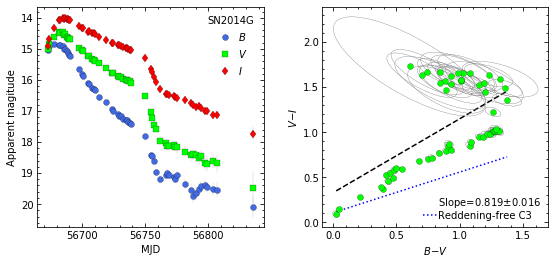

In [8]:
C3M1.plot('lc+c3', sn='SN2014G', time_label='MJD')

As we can see, the light curves of SN 2014G (left-hand panel) begin before the maximum light and end during the radioactive tail phase. In the color-color diagram (right-hand panel), green circles are the V-I colors versus the B-V ones (corrected for Galactic extinction and K-correction). Since the errors in B-V and V-I are correlated, the confidence regions are elongated ellipses. The blue dotted line represents a reddening-free C3 (with slope of 0.45 and y-intercept of 0.108 mag), while the black dashed one is a linear fit to the data. The deviant points at V-I>1.2 mag correspond to epochs after the end of the plateau phase. To delete them, we set `t_max=56745`. In addition, we delete points before and during the maximum (which do not belong to the plateau phase), setting `t_min=56690`

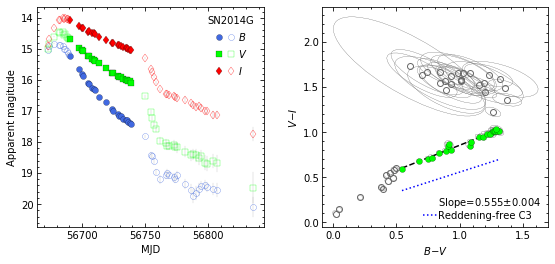

In [9]:
C3M = Color_Color_Curve_Method(t_BVI, z_helio=z_helio, EGBV=EGBV, t_min=56690, t_max=56745)
C3M.plot('lc+c3', sn='SN2014G', time_label='MJD')

In the figure, the deleted points are marked as empty symbols. In the color-color diagram (right-hand panel), the vertical displacement of the plateau-phase points with respect to the reddening-free C3 is due the host galaxy color excess. For each point in the C3, the color excess can be estimated through

$$E_\mathrm{h}(B\!-\!V)_i=\frac{(V\!-\!I)_i-m\cdot(B\!-\!V)_i}{R_V-R_I-m}+\mathrm{ZP},$$

where $R_V=3.1$, $R_I=1.72$, $m=0.45\!\pm\!0.07$ is the V-I versus B-V C3 slope, and $\mathrm{ZP}=-0.116\!\pm\!0.024$ is the zero-point for the C3 color excesses. Let's see the Eh(B-V) estimates for each point in the C3 as a function of the time

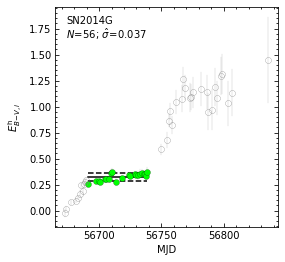

In [10]:
C3M.plot('Eh', sn='SN2014G', time_label='MJD')

As visible in the figure, the Eh(B-V) estimates computed with the selected data (during the plateau phase, green circles) seem to be consistent with a constant Eh(B-V) value (solid line). However, if we plot only the selected data

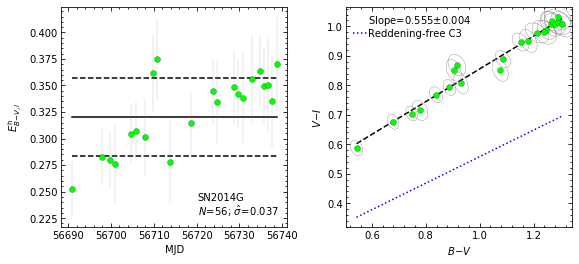

In [11]:
C3M.plot('Eh-zoom+c3-zoom', sn='SN2014G', time_label='MJD')

We see that there is a correlation between the Eh(B-V) estimates and the time. The latter is due to the C3 slope of SN2014G is greater than the adopted C3 slope (but consistent with it within 1.5-sigma). Indeed, as we can see in the color-color plot (right panel), the bluest points (which correspond to early epochs) are closer to the reddening-free C3, so their Eh(B-V) estimates are lower than those computed with the reddest points at later epochs. In general, the higher the difference between the C3 slope of the input SN and the adopted value, the higher the sample standard deviation around the estimated Eh(B-V) value (solid line in the left panel). The latter increases the final error on Eh(B-V).

To get the host galaxy color excess, execute

In [12]:
C3M.EhBV

0.32

The one-sigma statistical error is given by

In [13]:
C3M.err_EhBV["stat"]

0.049

while the total one-sigma error (which includes the ZP error of 0.025 mag) is given by

In [14]:
C3M.err_EhBV["stat+sys"]

0.055

## 5) Final Remarks

The K-corrections for the B-V and V-I colors implemented in the C3M code are valid for epochs before the end of the plateau phase and for z_helio<0.04. If you want to compute Eh(B-V) with the C3M code for SNe II at higher redshifts, then you have to apply the K-correction to the input BVI photometry, and then run the C3M code setting `z_helio=0.0`
 
Finally, I remark that the C3 method is not the definitive one to estimate Eh(B-V) values for SNe II. It has systematics that still have to be analyzed. Instead, the C3 method aims to provide more information about the SNe II color excesses. A better estimation of the Eh(B-V) could be obtained combining results from the C3M with those from other independent methods, like those used in  [Olivares E et al. (2010)](https://ui.adsabs.harvard.edu/abs/2010ApJ...715..833O/abstract).